<a href="https://colab.research.google.com/github/acostac94/mvp_sprints/blob/main/MVP_S1_Arthur_Costa_Cerqueira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **MVP - TREINAMENTO DE MODELOS DE MACHINE LEARNING PARA PROBLEMAS DE CLASSIFICAÇÃO**

---
*Arthur Costa Cerqueira*

Matrícula: 4052024000086

e-mail: arthurcosta.c@gmail.com


#**1. TESTANDO MODELOS DE MACHINE LEARNING PARA PROBLEMAS DE CLASSIFICAÇÃO**

## **1.1. DEFINIÇÃO DO PROBLEMA**

---
>Este projeto aborda um conjunto de dados relacionado ao câncer de mama. A
problemática abordada é a análise e a classificação de amostras de tecido mamário em benigno ou maligno, com base em características observadas nos exames clínicos. Este tipo de análise é fundamental para a detecção precoce e o tratamento eficaz do câncer de mama, uma vez que tumores malignos precisam ser identificados o mais cedo possível para aumentar as chances de sucesso no tratamento.

---



## **1.2. PREPARAÇÃO DOS DADOS**

In [1]:
# Instalando biblioteca Scikit-learn
!pip install -U scikit-learn
# Instalando o repositório do pacote de Dataset
!pip install ucimlrepo
# Instalando o repositório do pacote do Pandas
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


>Inicialmente, instala-se as bibliotecas scikit-learn, ucimlrepo (repositório de conjuntos de dados para machine learning) e Pandas. Essas bibliotecas são essenciais para análise de dados e construção de modelos de machine learning em Python.
---

In [2]:
# Iniciando com os imports dos pacotes necessários para o notebook
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários das aplicações matemáticas e estatísticas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar o repositório da UCI
from ucimlrepo import fetch_ucirepo

# Importar o dataset Breast Cancer
from sklearn.datasets import load_breast_cancer

# Imports para preparo dos dados e modelagem
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder

# Imports dos modelos de classificação
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Imports das técnicas avançadas de machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Imports para o Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE

>A primeira etapa para a análise de dados usando Python se caracteriza pela
importação de pacotes e bibliotecas, como o Pandas para manipulação de dados, NumPy para operações matemáticas, e Matplotlib para visualização de dados.

>A biblioteca de dataset é importada através do pacote ucimlrepo, que é usada para baixar conjuntos de dados do repositório da UCI. Importa-se também os algoritmos de classificação, de pré-processamento, de modelagem de dados, das métricas de acurácia, dos ensembles, e do pipeline, todos da biblioteca do SKLearn.
---

In [3]:
# Iniciando a manipulação do dataset
# Busca do dataset no repositório da UCI
breast_cancer = fetch_ucirepo(id=14)

# Separação dos dados em X e Y (conforme dataframe do Pandas)
X = breast_cancer.data.features
y = breast_cancer.data.targets

# Carregar o dataset no notebook
breast_cancer = load_breast_cancer()

# Conversão para dataframe do Pandas
dataset = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# Informações sobre o conjunto de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
# Adição da coluna target (coluna que testaremos a classificação do tecido como malígno ou benígno)
dataset['target'] = breast_cancer.target

dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


>A manipulação do dataset de câncer de mama inicia com os dados sendo separados em X (atributos/features) e y (rótulos/targets). O dataset contém 30 features (características mensuradas das amostras), e 569 instâncias. Os dados de cada atributo são do tipo numérico contínuo.

>O dataset deve ser convertido para o DataFrame do Pandas, visando tornar o conjunto operável com os demais manipuladores matemáticos da modelagem. Nesta etapa, adiciona-se uma coluna chamada 'target' que representa o rótulo de cada amostra (indicando se a amostra é benigna ou maligna), sendo 0 para tumores benignos e 1 para tumores malignos. Estes rótulos serão armazenados em breast_cancer.target.
---

In [5]:
# Preparação dos dados
# Tamanho do conjunto de teste (20% dos dados separados para teste e 80% dos dados separados para treino)
test_size = 0.20

# Semente aleatória
seed = 7

# Separação em bases de treino e teste (holdout)
array = dataset.values

# Atributos
X = array[:,0:30]

# Classe (target)
y = array[:,30]

# Faz a divisão em bases de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Criando os folds para a validação cruzada

# Número de folds da validação cruzada
scoring = 'accuracy'
num_particoes = 10

# Faz o particionamento em 10 folds
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)


>Com a separação do dataset em bases de treino e teste (holdout), o conjunto de dados original é convertido em um array numpy. Esse array contém todas as linhas e colunas do conjunto de dados. Ele separa os atributos (X) e a classe (y) do conjunto de dados, onde X contém todas as linhas e as primeiras 30 colunas do array (os atributos), enquanto y contém todas as linhas e a trigésima primeira (31ª) coluna do array (a qual é a classe target adicionada).

>O holdout é definido na proporção 80% dos dados para treino (X_train, y_train) e 20% para teste (X_test, y_test). Ou seja, os modelos de classificação serão treinados com 80% dos dados e testados com 20%. O parâmetro seed garante que a divisão seja feita de forma reproduzível.

>Cria-se folds (partições) para a validação cruzada. Define-se o número de folds como 10, o que significa que os 30 atributos serão divididos em 10 partes iguais. O parâmetro "shuffle=True" indica que os dados serão embaralhados antes da divisão das partições, portanto, os conjuntos terão 3 atributos aleatórios.
---

## **1.3. MODELAGEM E TREINAMENTO**

KNN: 0.936232 (0.045443)
CART: 0.916184 (0.043158)
NB: 0.933720 (0.041136)
SVM: 0.907295 (0.057778)


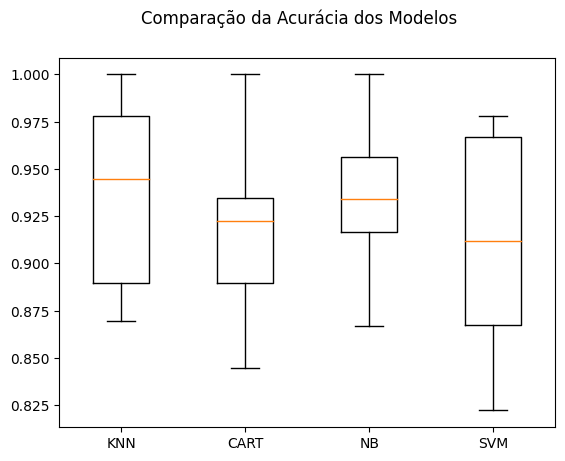

In [6]:
# Modelagem dos Classificadores
# Definindo uma seed global que servirá para todas as etapas de modelgem
np.random.seed(seed)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold.split(X_train), scoring=scoring)
  results.append(cv_results)
  names.append(name)

  # Média e desvio padrão dos 10 resultados da validação cruzada
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

>A modelagem inicial consiste em aplicar 4 técnicas de classificação (KNN, Árvore de Decisão, Naive Bayes e SVM) na base de dados de treinamento. Este treinamento ocorre através de particionamento dos atributos, e os resultados de cada treino são armazenados em listas para os modelos, os resultados e os nomes.

>Para cada modelo treinado, executa-se a validação cruzada (cross_val_score) com 10 folds (partições) usando os dados de treinamento (X_train, y_train). O desempenho de cada modelo é armazenado na lista results e o nome do modelo treinado é armazenado na lista names.

>Realiza-se o cálculo da média e o desvio padrão da acurácia da validação cruzada. O resultado final desta etapa é um gráfico boxplot criado para comparar a acurácia dos modelos. Portanto, este bloco de código cria, avalia e compara quatro modelos de classificação diferentes usando validação cruzada.

>KNN: A acurácia média do KNN foi de 93,62%, com um desvio padrão de 4,54%, em relação a média nos diferentes folds da validação cruzada. Isso significa que, em média, o modelo KNN apresentou a melhor acurácia de acerto na classificação das amostras de câncer de mama entre benígno (0) ou malígno (1).

>CART: A acurácia média da árvore de decisão (CART) foi de aproximadamente 91,62%, com um desvio padrão de aproximadamente 4,32%.

>NB: A acurácia média do Naive Bayes foi de aproximadamente 93,37%, com um desvio padrão de aproximadamente 4,11%.

>SVM: A acurácia média do SVM foi de aproximadamente 90,73%, com um desvio padrão de aproximadamente 5,78%.
---

## **1.4. AVALIAÇÃO DE RESULTADOS**

In [7]:
# Criando um modelo com todo o conjunto de treino
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)

modelCART = DecisionTreeClassifier()
modelCART.fit(X_train, y_train)

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

modelSVM = SVC()
modelSVM.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictionsNB = modelNB.predict(X_test)
predictionsCART = modelCART.predict(X_test)
predictionsKNN = modelKNN.predict(X_test)
predictionsSVM = modelSVM.predict(X_test)

acuracia_NB = accuracy_score(y_test, predictionsNB)
acuracia_CART = accuracy_score(y_test, predictionsCART)
acuracia_KNN = accuracy_score(y_test, predictionsKNN)
acuracia_SVM = accuracy_score(y_test, predictionsSVM)

# Estimando a acurácia no conjunto de teste
print('A acurácia do modelo Naive Bayes é: ', acuracia_NB)
print('A acurácia do modelo Árvore de Decisão é: ', acuracia_CART)
print('A acurácia do modelo KNN é: ', acuracia_KNN)
print('A acurácia do modelo SVM é: ', acuracia_SVM)
print('\nO modelo com maior acurácia usando todo o conjunto de treino foi o Naive Bayes.')

A acurácia do modelo Naive Bayes é:  0.956140350877193
A acurácia do modelo Árvore de Decisão é:  0.9298245614035088
A acurácia do modelo KNN é:  0.9298245614035088
A acurácia do modelo SVM é:  0.9035087719298246

O modelo com maior acurácia usando todo o conjunto de treino foi o Naive Bayes.


>A avaliação dos resultados se baseia na comparação do desempenho dos 4 modelos de classificação (KNN, Naive Bayes, Árvore de Decisão, SVM) com todo o conjunto de dados. Em seguida, realiza-se predições com o conjunto de teste (X_test). Buscando, portanto, a acurácia de cada modelo comparando as predições realizada com a base de teste com os rótulos reais (y_test) do conjunto de teste.

>Esse processo ajuda a determinar qual modelo é mais adequado para a tarefa de classificação com base nos dados disponíveis. Os resultados mostram a acurácia de diferentes modelos de classificação ao serem testados no conjunto de treinamento dados (X_train e y_train). A acurácia é uma métrica que indica a proporção de predições corretas feitas pelo modelo em relação ao total de predições feitas.

>O modelo Naive Bayes obteve a maior acurácia entre os modelos testados no conjunto de treino, ou seja, no conjunto com 80% das amostras de tecido. Resultando em uma acurácia de 95,61% na predição de amostras com câncer de mama no conjunto de treino.
---

# **2. RECURSOS AVANÇADOS DE MACHINE LEARNING PARA PROBLEMAS DE CLASSIFICAÇÃO**

---
>Neste item, propõe-se avaliar os modelos de classificação utilizando diferentes técnicas de ensembles e pipelines. Os ensembles abordados serão o Bagging, o Random Forest, o Extra Trees, o AdaBoost, o Gradient Boosting e o Voting. Busca-se através destas técnicas avançadas de machine learning a validação cruzada entre os dados brutos, os padronizados e os normalizados. Além disso, será executado também otimização de hiperparâmetros de um dos modelos de classificação buscando a melhor configuação que gera o melhor resultado.
---

## **2.1. DEFINIÇÃO DO PROBLEMA**

---
>O objetivo deste item é avaliar se as técnicas avançadas de machine learning, através do uso de ensembles e pipelines, são capazes melhorar a predição dos modelos de classificação testados. Busca-se entender se, após a aplicação desta rotina de machine learning, ocorrerá o aperfeiçoamento da classificação das amostras de tecido mamário quanto ao diagnóstico de tumor benígno e tumor malígno.
---

## **2.2. MODELAGEM E TREINAMENTO**

### **2.2.1. Modelagem de Classificadores Utilizando Ensembles**

LR: 0.953671 (0.028955)
KNN: 0.936232 (0.045443)
CART: 0.916135 (0.048526)
NB: 0.933720 (0.041136)
SVM: 0.907295 (0.057778)
Bagging: 0.957971 (0.039108)
RF: 0.955749 (0.039754)
ET: 0.955797 (0.032996)
Ada: 0.964686 (0.026629)
GB: 0.955797 (0.035923)
Voting: 0.953527 (0.042650)


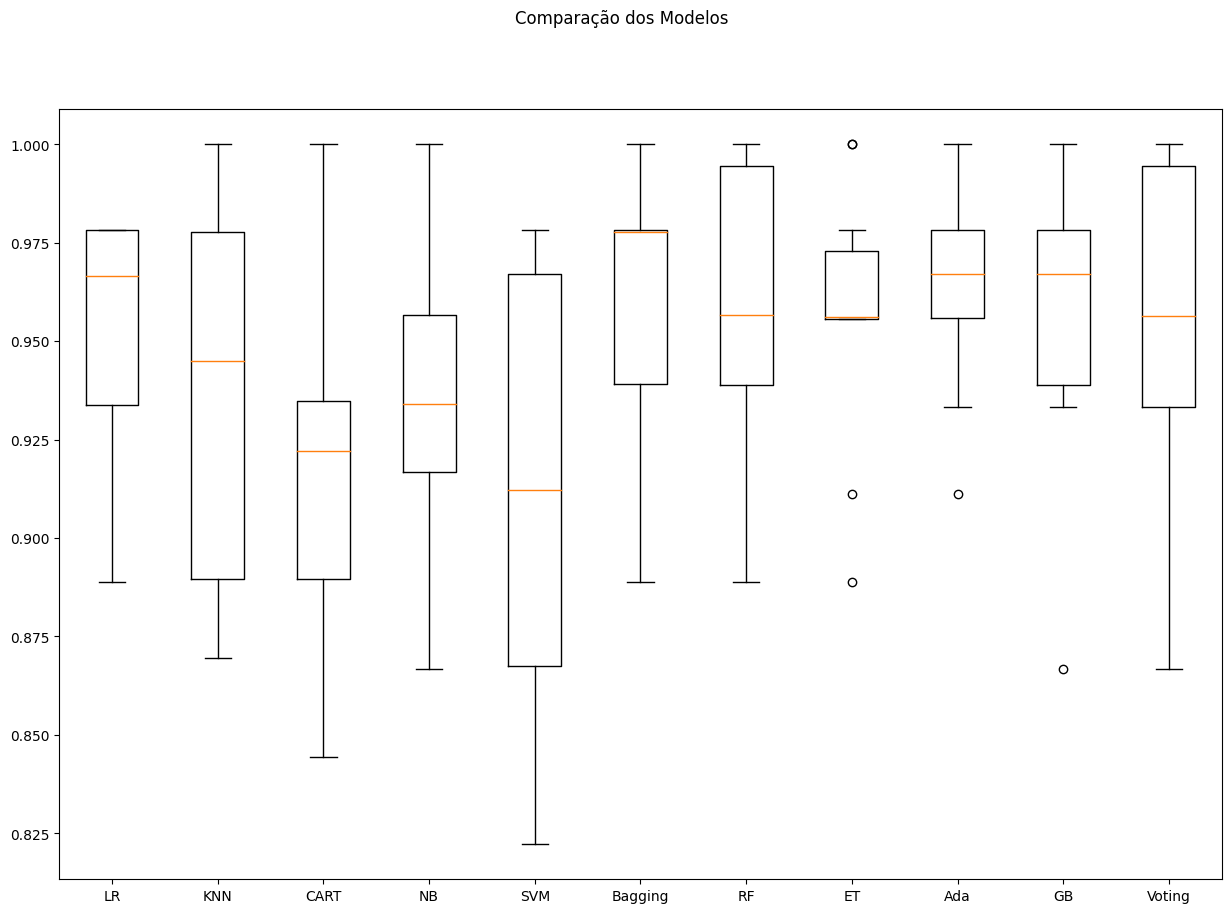

In [8]:
# Modelagem dos Classificadores Utilizando Ensembles
# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


>Neste bloco ocorre a classificação dos dados com modelos individuais e modelos com ensembles. Os modelos individuais são os mesmos do item 1. (KNN, Árvore de Decisão, Naive Bayes e SVM) incluindo a Regressão Logística. Enquanto que os modelos com ensembles são o Bagging, Random Forest, Extra Trees, AdaBoost, Gradient Boost e Voting.

>Os parâmetros definidos para o ensemble Bagging foram o classificador base sendo a Árvore de Decisão, o número de árvores é 100 e o número máximo de features é 3. Enquanto que o ensemble Voting recebe como classificadores base os modelos Regressão Logística, Árvore de Decisão e SVM.

>Para cada técnica de ensemble (Bagging, Random Forest, Extra Trees, AdaBoost, Gradient Boosting, Voting), um modelo é criado com os parâmetros correspondentes e adicionado à lista de modelos. Para cada modelo na lista, é realizada uma validação cruzada (cross-validation) usando cross_val_score para calcular a precisão média e o desvio padrão da precisão.

>Um boxplot é gerado para comparar as distribuições das precisões dos diferentes modelos. Cada caixa no gráfico representa a distribuição das precisões obtidas pelos modelos durante a validação cruzada. Esses resultados representam a precisão média e o desvio padrão da precisão para cada modelo de classificação avaliado usando validação cruzada. Um desvio padrão maior pode indicar maior variabilidade nos resultados da validação cruzada, o que pode ser útil para avaliar a estabilidade do modelo.

>Em termos de precisão média, o modelo AdaBoost (Ada) obteve a maior precisão média (96,47%), seguido pelo Bagging com 95,80%, Extra Trees (ET) com 95,58% e Random Forest com 95,57%.
---

### **2.2.2. Modelagem de Pipelines**

LR-orig: 0.954 (0.029)
KNN-orig: 0.936 (0.045)
CART-orig: 0.925 (0.040)
NB-orig: 0.934 (0.041)
SVM-orig: 0.907 (0.058)
Bag-orig: 0.956 (0.041)
RF-orig: 0.954 (0.039)
ET-orig: 0.962 (0.032)
Ada-orig: 0.965 (0.027)
GB-orig: 0.954 (0.034)
Vot-orig: 0.956 (0.042)
LR-padr: 0.971 (0.022)
KNN-padr: 0.960 (0.031)
CART-padr: 0.925 (0.049)
NB-padr: 0.938 (0.043)
SVM-padr: 0.967 (0.018)
Bag-padr: 0.949 (0.030)
RF-padr: 0.954 (0.038)
ET-padr: 0.956 (0.034)
Ada-padr: 0.963 (0.026)
GB-padr: 0.956 (0.036)
Vot-padr: 0.971 (0.022)
LR-norm: 0.963 (0.024)
KNN-norm: 0.967 (0.029)
CART-norm: 0.921 (0.035)
NB-norm: 0.938 (0.043)
SVM-norm: 0.976 (0.018)
Bag-norm: 0.965 (0.033)
RF-norm: 0.958 (0.042)
ET-norm: 0.965 (0.027)
Ada-norm: 0.963 (0.026)
GB-norm: 0.956 (0.036)
Vot-norm: 0.969 (0.022)


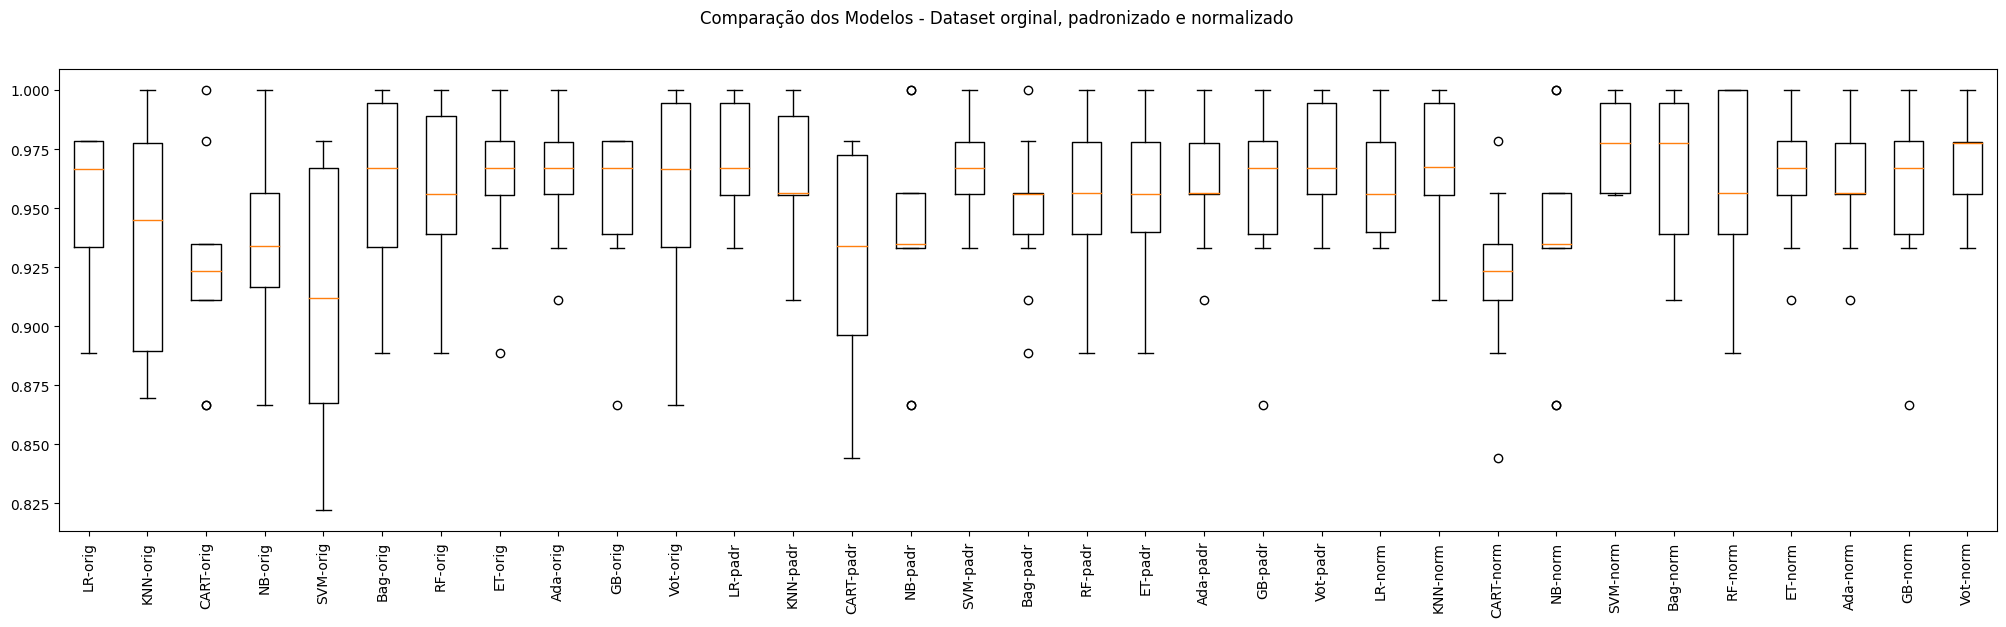

In [9]:
# Modelagem dos Pipelines
# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline
# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines
# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

    # formatando para 3 casas decimais
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()


>A  modelagem de pipelines é aplicada para diferentes algoritmos de classificação e diferentes métodos de pré-processamento de dados. A avaliação do desempenho dos modelos utiliza a validação cruzada, ajudando a identificar quais abordagens funcionam melhor para o conjunto de dados.

>Os pipelines são montados combinando os modelos e transformações de diferentes maneiras. Neste sentido, haverá um pipeline, para cada um dos modelos de classificação, aplicados em dados originais não processados, em dados padronizados e em dados normalizados. Cada pipeline é avaliado com validação cruzada. Os resultados são armazenados na lista "results" junto com os nomes dos pipelines na lista "names".

>Os resultados representam a precisão média e o desvio padrão da precisão para diferentes modelos de classificação com diferentes métodos de pré-processamento de dados. Os quais corroboram na comparação da performance dos modelos de classificação com diferentes métodos de pré-processamento de dados.

>Os modelos com pré-processamento ("-padr" e "-norm") apresentaram melhor desempenho do que os modelos sem pré-processamento ("-orig"). Além disso, podemos ver que a padronização (standard scaler) e a normalização (min-max scaler) dos dados geralmente melhoram a precisão dos modelos em comparação com o uso dos dados originais. Além disso, as melhores acurácias são dos modelos Regressão Logística, SVM e Voting.
---

### **2.2.3. Ajuste de Hiperparâmetro**

In [10]:
# Ajuste de hiperparâmetro a partir da Regressão Logística
# Criando a lista de armazenamento dos resultados de Pipeline
pipelines = []

# Definindo os componentes do pipeline
log_reg = ('LogisticRegression', LogisticRegression(max_iter=200))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('logreg-orig', Pipeline(steps=[log_reg])))
pipelines.append(('logreg-padr', Pipeline(steps=[standard_scaler, log_reg])))
pipelines.append(('logreg-norm', Pipeline(steps=[min_max_scaler, log_reg])))

param_grid = {
    'LogisticRegression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'LogisticRegression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'LogisticRegression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)

    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: logreg-orig - Melhor: 0.962415 usando {'LogisticRegression__C': 100, 'LogisticRegression__penalty': 'l1', 'LogisticRegression__solver': 'liblinear'}
Sem tratamento de missings: logreg-padr - Melhor: 0.980145 usando {'LogisticRegression__C': 1, 'LogisticRegression__penalty': 'l1', 'LogisticRegression__solver': 'liblinear'}
Sem tratamento de missings: logreg-norm - Melhor: 0.977971 usando {'LogisticRegression__C': 10, 'LogisticRegression__penalty': 'l2', 'LogisticRegression__solver': 'newton-cg'}


In [11]:
# Ajuste de hiperparâmetro a partir do SVM
# Criando a lista de armazenamento dos resultados de Pipeline
pipelines = []

# Definindo os componentes do pipeline
svm = ('SVM', SVC())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('svm-orig', Pipeline(steps=[svm])))
pipelines.append(('svm-padr', Pipeline(steps=[standard_scaler, svm])))
pipelines.append(('svm-norm', Pipeline(steps=[min_max_scaler, svm])))

param_grid = {
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__kernel': ['linear', 'rbf'],
    'SVM__gamma': ['scale', 'auto']
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)

    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: svm-orig - Melhor: 0.962512 usando {'SVM__C': 1, 'SVM__gamma': 'scale', 'SVM__kernel': 'linear'}
Sem tratamento de missings: svm-padr - Melhor: 0.971304 usando {'SVM__C': 0.1, 'SVM__gamma': 'scale', 'SVM__kernel': 'linear'}
Sem tratamento de missings: svm-norm - Melhor: 0.975797 usando {'SVM__C': 1, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


In [12]:
# Ajuste de hiperparâmetros a partir do Voting
# Criando a lista de armazenamento dos resultados de Pipeline
pipelines = []

# Definindo os modelos de classificação para o ensemble
models = [
    ('KNN', KNeighborsClassifier()),
    ('LogisticRegression', LogisticRegression(max_iter=200)),
    ('DecisionTree', DecisionTreeClassifier()),
    ('GaussianNB', GaussianNB()),
    ('SVC', SVC()),
    ('RandomForest', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
]

# Definindo o ensemble VotingClassifier
voting = ('Voting', VotingClassifier(estimators=models))

pipelines.append(('voting-orig', Pipeline(steps=[voting])))
pipelines.append(('voting-padr', Pipeline(steps=[standard_scaler, voting])))
pipelines.append(('voting-norm', Pipeline(steps=[min_max_scaler, voting])))

param_grid = {
    'Voting__voting': ['hard', 'soft']
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)

    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: voting-orig - Melhor: 0.955749 usando {'Voting__voting': 'hard'}
Sem tratamento de missings: voting-padr - Melhor: 0.960193 usando {'Voting__voting': 'hard'}
Sem tratamento de missings: voting-norm - Melhor: 0.958019 usando {'Voting__voting': 'hard'}


>Optou-se por testar os ajustes de hiperparâmetros dos três modelos de classificação que apresentaram a melhor acurácia na classificação com técnica de pipeline. O resultado representa a acurácia média obtida durante a validação cruzada para diferentes configurações do modelo em três cenários: sem tratamento especial dos dados, com padronização e com normalização dos dados.

>A interpretação dos resultados deste bloco considera apenas o modelo de classificação que melhor se ajustou os hiperparâmetros, que foi o Regressão Logística. Observando que, para este dataset, o melhor desempenho foi obtido com a padronização ou normalização dos dados, utilizando diferentes conjuntos de hiperparâmetros.

>Para o cenário "logreg-orig" (sem tratamento de dados), a melhor acurácia foi de aproximadamente 96.24% utilizando o modelo de Regressão Logística com parâmetros C=100, penalty='l1' e solver='liblinear'.

>Para o cenário "logreg-padr" (com padronização dos dados), a melhor acurácia foi de aproximadamente 97.79% utilizando o modelo de Regressão Logística com parâmetros C=0.1, penalty='l2' e solver='liblinear'.

>Para o cenário "logreg-norm" (com normalização dos dados), a melhor acurácia foi de aproximadamente 97.80% utilizando o modelo de Regressão Logística com parâmetros C=10, penalty='l2' e solver='newton-cg'.
---

## **2.4. AVALIAÇÃO DOS RESULTADOS**

In [13]:
# Avaliação do modelo com o conjunto de testes
# Ajuste do scaler com o conjunto de treino
scaler = StandardScaler().fit(X_train)

# Aplicação da padronização no conjunto de treino
rescaledX = scaler.transform(X_train)
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
# Aplicação da padronização no conjunto de teste
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9824561403508771


>Considerando as técnicas avançadas de machine learning, o modelo de classificação da Regressão Logística apresentou a melhor acurácia na predição das classes do dataset. Portanto, este será o modelo avaliado na verificação final da predição de classe com dados novos.

>A avaliação de um modelo de Regressão Logística usando um conjunto de testes visa garantir que o scaler é ajustado apenas aos dados de treino, evitando vazamento de informações do conjunto de teste para o treinamento. Com o modelo treinado é aplicado para todo o dataset para garantir que os dados estejam na mesma escala antes de fazer previsões e calcular a acurácia.

>A acurácia do modelo de Regressão Logística ao fazer previsões no conjunto de teste após o treinamento foi de 98.25% das amostras no conjunto de teste. Uma acurácia alta indica que o modelo teve um bom desempenho na classificação das amostras do conjunto de teste.
---

In [14]:
# Preparação do modelo com TODO o dataset
# Ajuste do scaler com TODO o dataset
scaler = StandardScaler().fit(X)

# Aplicação da padronização com TODO o dataset
rescaledX = scaler.transform(X)
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)


>Aplica-se um modelo de Regressão Logística para ser treinado com todo o conjunto de dados, sem dividir em conjuntos de treino e teste. O StandardScaler é ajustado com todo o conjunto de dados (X), calculando a média e o desvio padrão de cada característica no conjunto completo. O modelo de Regressão Logística é treinado com os dados padronizados (rescaledX) e os rótulos de classe (y), usando todo o conjunto de dados para o treinamento.

>O resultado do treinamento é um modelo de Regressão Logística que foi ajustado ao conjunto de dados completo (todo o dataset). Isso pode resultar em um modelo que se adapta muito bem aos dados disponíveis, no entanto, é avaliar seu desempenho em dados não vistos para verificar se ele generaliza bem.
---

In [15]:
# Novos dados - não sabemos a classe!
data = {'radius':  [18.25, 17.75, 18.05],
        'texture': [10.20, 10.45, 10.30],
        'perimeter': [123.5, 121.9, 123.0],
        'area': [995.0, 1010.0, 1005.0],
        'smoothness': [0.1200, 0.1150, 0.1220],
        'compactness': [0.2800, 0.2750, 0.2790],
        'concavity': [0.3050, 0.2980, 0.3020],
        'concave': [0.1450, 0.1500, 0.1420],
        'symmetry': [0.2400, 0.2450, 0.2390],
        'fractal': [0.0800, 0.0750, 0.0790],
        'radius error': [1.100, 1.090, 1.105],
        'texture error': [0.9100, 0.9000, 0.9150],
        'perimeter error': [8.600, 8.580, 8.595],
        'area error': [154.0, 152.5, 153.0],
        'smoothness error': [0.006420, 0.006380, 0.006410],
        'compactness error': [0.04910, 0.04890, 0.04900],
        'concavity error': [0.05380, 0.05360, 0.05370],
        'points error': [0.01590, 0.01580, 0.01585],
        'symmetry error': [0.03010, 0.02990, 0.03000],
        'dimension error': [0.006200, 0.006180, 0.006190],
        'worst radius': [30.123, 7.890, 12.345],
        'worst texture': [17.25, 17.40, 17.30],
        'worst perimeter': [185.00, 184.40, 184.80],
        'worst area': [2020.0, 2018.0, 2021.0],
        'worst smoothness': [0.16200, 0.16230, 0.16210],
        'worst compactness': [0.66500, 0.66600, 0.66400],
        'worst concavity': [0.7120, 0.7118, 0.7122],
        'worst concave': [0.2650, 0.2655, 0.2653],
        'worst symmetry': [0.4600, 0.4602, 0.4599],
        'worst fractal': [0.1190, 0.1188, 0.1191]
        }

atributos = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
             'compactness', 'concavity', 'concave', 'symmetry', 'fractal',
             'radius error', 'texture error', 'perimeter error', 'area error',
             'smoothness error', 'compactness error', 'concavity error',
             'points error', 'symmetry error', 'dimension error',
             'worst radius', 'worst texture', 'worst perimeter', 'worst area',
             'worst smoothness', 'worst compactness', 'worst concavity',
             'worst concave', 'worst symmetry', 'worst fractal']

entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:30].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 1.17090767 -2.11522222  1.29876683  0.96731029  1.68233104  3.32899822
   2.71439334  2.47830785  2.14814708  2.43861781  2.50777998 -0.55673764
   2.8384762   2.50077858 -0.20700136  1.32021494  0.72634715  0.66568623
   1.15723216  0.90973084  2.86888206 -1.37232098  2.31551496  2.0029954
   1.29891909  2.61284819  2.1100061   2.28998549  2.74900446  1.94255619]
 [ 1.02890057 -2.05704554  1.23286251  1.00997183  1.32650383  3.23424082
   2.62650854  2.60727777  2.33069425  1.72981578  2.47168788 -0.57488108
   2.82857559  2.46777602 -0.22033524  1.30903703  0.71971575  0.64946526
   1.13301646  0.90216581 -1.73518382 -1.34789441  2.29764346  1.99947958
   1.31206986  2.61920958  2.10904659  2.29759879  2.75224002  1.93147303]
 [ 1.11410483 -2.09195155  1.27817173  0.99575132  1.82466192  3.31004674
   2.67672843  2.40092591  2.11163765  2.2968574   2.52582603 -0.54766592
   2.83600105  2.47877687 -0.21033483  1.31462599  0.72303145  0.65757575
   1.14512431  0.90594833 -0.81263115

In [16]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 0. 0.]



>O resultado indica as classes previstas para os dados novos de entrada. No contexto de classificação de amostras de tumores, o valor 0 representa a classe "benigno", enquanto o valor 1 representa "maligno". Neste caso, todas as três previsões dos dados novos foram para a classe 0, indicando que os dados de entrada adicionados nesta avaliação foram classificados como tumores benignos.
---

# **3. APLICANDO FEATURE SELECTION NO DATASET**

---
>O feature selection é o processo de selecionar um subconjunto relevante de variáveis (features) a partir de um conjunto de dados original (dataset). A finalidade principal do feature selection é melhorar o desempenho dos modelos de machine learning, reduzindo o overfitting, aumentando a acurácia e a interpretabilidade do modelo, e reduzindo o tempo de treinamento.

>Ao remover features irrelevantes, redundantes ou que causem ruído nos dados, o feature selection simplifica o modelo, tornando-o mais fácil de interpretar e mais eficiente computacionalmente. Esta técnica é aplicável em conjuntos de dados com muitas variáveis, onde nem todas as variáveis contribuem igualmente para a predição do modelo.
---

In [17]:
# Verificando as classes presentes em 'target'
classes = dataset['target'].unique()
print("Classes presentes em 'target':", classes)

Classes presentes em 'target': [0 1]


In [18]:
# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=10)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:30])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)

# 3 casas decimais
np.set_printoptions(precision=3)
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:30]))


Número original de atributos: 30

Número reduzido de atributos: 10

Atributos Originais: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

Scores dos Atributos Originais: [6.470e+02 1.181e+02 6.972e+02 5.731e+02 8.365e+01 3.132e+02 5.338e+02
 8.617e+02 6.953e+01 9.346e-02 2.688e+02 3.909e-02 2.539e+02 2.437e+02
 2.558e+00 5.325e+01 3.901e+01 1.133e+02 2.412e-02 3.468e+00 8.608e+02
 1.


>O resultado mostra que o número original de atributos é 30, mas após a seleção, o número reduzido de atributos é 10. Os atributos selecionados são listados como 'mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity' e 'worst concave points', os quais têm as pontuações mais altas de acordo com o método de seleção. Essa abordagem é útil para simplificar modelos e manter apenas os atributos mais importantes para a predição.
---

In [19]:
# Eliminação Recursiva de Atributos
# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=10)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:30])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:30]))

Atributos Originais: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

Atributos Selecionados: [ True False False False False False  True  True  True False False False
  True False False False False False False False False False False False
  True  True  True  True  True False]

Ranking de atributos: [ 1  6 12 21 10  5  1  1  1 17  8  2  1  7 18 20  9 11 15 19 14  3  4 16
  1  1  1  1 


>O resultado mostra que dos 30 atributos originais, os atributos selecionados são 'mean radius', 'mean concavity', 'mean concave points', 'mean symmetry', 'perimeter error', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points' e 'worst symmetry'. Esses atributos foram marcados como True em "Atributos Selecionados" e têm valor 1 em "Ranking de atributos", indicando que foram classificados como os mais importantes pelo RFE. O parâmetro n_features_to_select foi definido como 10, então o modelo selecionou os 10 melhores atributos.
---

In [20]:
# Importância de Atributos com ExtraTrees
# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:30])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
[0.065 0.019 0.063 0.068 0.008 0.025 0.058 0.064 0.007 0.006 0.027 0.006
 0.014 0.04  0.006 0.008 0.012 0.007 0.006 0.007 0.088 0.024 0.076 0.084
 0.018 0.025 0.051 0.093 0.017 0.008]



> Os valores representam a importância de cada atributo para o modelo ExtraTreesClassifier. Quanto maior o valor, mais importante é o atributo. Esses valores são calculados com base em como cada atributo contribui para a redução da impureza nas árvores de decisão do modelo. Por exemplo, um valor de 0.065 para 'mean radius' significa que 'mean radius' é responsável por 6.5% da decisão feita pelo modelo ExtraTreesClassifier.
---

# **4. CONSIDERAÇÕES FINAIS**

---
>Este projeto se propõe a treina e avaliar diferentes modelos de machine learging para um problema de classificação de um dataset de amostras de tecido de câncer de mama. O retorno esperado da predição é acusar se a amostra em questão se trata de um tumor benígno (valor 0) ou malígno (valor 1).

>Através do treinamento de modelos com as configurações padrões da biblioteca do scikit-learn, obteve-se a melhor acurácia na classificação com o método do Naive Bayes, com 95,61% de acurácia na predição das classes das amostras de tecido.

>A aplicação de recursos avançados de machine learning com as técnicas de ensembles e pipelines sugere que os melhores modelos de classicação são AdaBoost e Regressão Logística, respectivamente. Sendo uma acurácia de 96,47% do primeiro, e 97,10% do segundo, na predição de classe benígno ou malígno de tecido de câncer de mama.

>Foram testados os ajustes de hiperparâmetros de três modelos de classificação que apresentaram melhor acurácia em um pipeline. Os resultados foram obtidos através da validação cruzada em três cenários: sem tratamento especial dos dados, com padronização e com normalização dos dados.

>O modelo de Regressão Logística foi o que melhor se ajustou aos hiperparâmetros. Para o dataset em questão, a melhor performance foi obtida com a padronização ou normalização dos dados, utilizando diferentes conjuntos de hiperparâmetros.

>O feature selection é o processo de escolher um subconjunto relevante de variáveis de um conjunto de dados original. O objetivo é melhorar o desempenho dos modelos de machine learning, reduzindo o overfitting, aumentando a acurácia e a interpretabilidade do modelo, e diminuindo o tempo de treinamento. Ao remover features irrelevantes, redundantes ou que causam ruído, o feature selection simplifica o modelo, tornando-o mais fácil de interpretar e mais eficiente computacionalmente. É útil em conjuntos de dados com muitas variáveis, onde nem todas contribuem igualmente para a predição.

>A partir do dataset original com 30 atributos, o feature selection pode reduzir esse número para 10, selecionando os atributos mais importantes, como 'mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity' e 'worst concave points', que têm as pontuações mais altas de acordo com o método de seleção. Isso simplifica o modelo e mantém apenas os atributos mais relevantes.
---
